In [1]:
!wget -N "https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/Cotton_Disease.zip"
!unzip -qo Cotton_Disease.zip 
!rm Cotton_Disease.zip

--2021-09-09 09:07:29--  https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/Cotton_Disease.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.156.27
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.156.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99391772 (95M) [application/zip]
Saving to: ‘Cotton_Disease.zip’

Cotton_Disease.zip  100%[===================>]  94.79M  11.5MB/s    in 10s     

2021-09-09 09:07:40 (9.45 MB/s) - ‘Cotton_Disease.zip’ saved [99391772/99391772]



In [2]:
import cv2
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Text(0.5, 1.0, 'Diseased Cotton Leaf')

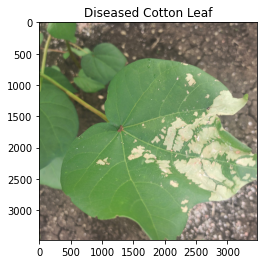

In [3]:
  # Check images
  img = cv2.imread("Cotton Disease/test/diseased cotton leaf/dis_leaf (124).jpg")
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.title("Diseased Cotton Leaf")

In [4]:
train_generator = ImageDataGenerator(rescale = 1./255, zoom_range=0.2, horizontal_flip=True, shear_range=0.2, vertical_flip=True, rotation_range=20)
test_generator = ImageDataGenerator(rescale = 1./255, zoom_range=0.2, horizontal_flip=True, shear_range=0.2, vertical_flip=True, rotation_range=20)

train_data = train_generator.flow_from_directory("Cotton Disease/train", target_size=(224,224), batch_size=64)
test_data = train_generator.flow_from_directory("Cotton Disease/test", target_size=(224,224), batch_size=64)

Found 1041 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [5]:
train_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [38]:
# Using VGG-16 for Detecting plant disease
from keras.applications.vgg16 import VGG16
from keras.layers import AveragePooling2D, Flatten, Dense, Dropout
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler

reduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=3, verbose=1)

modelCheckpoint = ModelCheckpoint(
    "/content/cotton_disease_prediction.h5",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    mode="auto",
    save_freq="epoch",
)
model = VGG16(input_shape=(224,224,3), include_top = False)

for layer in model.layers:
    layer.trainable = False

newModel = model.output
# newModel = AveragePooling2D()(newModel)
newModel = Flatten()(newModel)
newModel = Dense(128, activation="relu")(newModel)
newModel = Dropout(0.1)(newModel)
newModel = Dense(64, activation="relu")(newModel)
newModel = Dropout(0.1)(newModel)
newModel = Dense(30, activation="relu")(newModel)
newModel = Dropout(0.5)(newModel)
newModel = Dense(4, activation="softmax")(newModel)

model = Model(inputs=model.input, outputs=newModel)

In [39]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [40]:
# from tf.keras.optimizers import Adam
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [41]:
history = model.fit(train_data,validation_data=test_data,epochs=100,  callbacks=[reduce_lr, modelCheckpoint])

Epoch 1/100
17/17 [==============================] - 29s 2s/step - loss: 1.7549 - accuracy: 0.3026 - val_loss: 1.0939 - val_accuracy: 0.5943

Epoch 00001: val_loss improved from inf to 1.09389, saving model to /content/cotton_disease_prediction.h5
Epoch 2/100
17/17 [==============================] - 25s 1s/step - loss: 1.1411 - accuracy: 0.4332 - val_loss: 0.9134 - val_accuracy: 0.5566

Epoch 00002: val_loss improved from 1.09389 to 0.91340, saving model to /content/cotton_disease_prediction.h5
Epoch 3/100
17/17 [==============================] - 25s 1s/step - loss: 0.9721 - accuracy: 0.5485 - val_loss: 0.6905 - val_accuracy: 0.6792

Epoch 00003: val_loss improved from 0.91340 to 0.69048, saving model to /content/cotton_disease_prediction.h5
Epoch 4/100
17/17 [==============================] - 24s 1s/step - loss: 0.8340 - accuracy: 0.6052 - val_loss: 0.5311 - val_accuracy: 0.8208

Epoch 00004: val_loss improved from 0.69048 to 0.53106, saving model to /content/cotton_disease_prediction

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))

Text(0.5, 1.0, 'Training and Validation Accuracy')

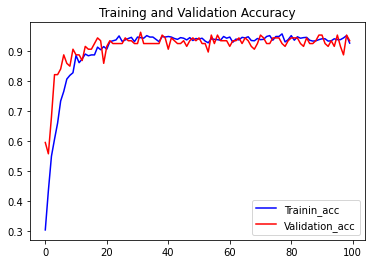

In [43]:
plt.plot(epochs,acc,label='Trainin_acc',color='blue')
plt.plot(epochs,val_acc,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

In [ ]:
class_dict = {0:'diseased cotton leaf',
              1:'diseased cotton plant',
              2:'fresh cotton leaf',
              3:'fresh cotton plant' }

fresh cotton leaf


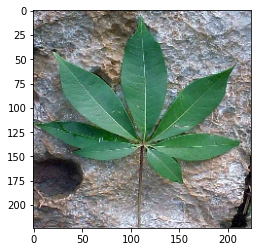

In [ ]:

file_path =  'image.jpg'
test_image = cv2.imread(file_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_CUBIC)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print(pred_class)